In [1]:
import sympy as sym
from sympy import latex
from IPython.display import display

## Два состояния ворот
${S}^1 \underset{\beta}{\stackrel{\alpha}{\rightleftarrows}} {S}^2$

Система уравнений Колмогорова
\begin{equation} 
	\begin{aligned}
	& \dot{P}^1=-\alpha {P}^1 + \beta {P}^2\\
	& \dot{P}^2=\alpha \mathrm{P}^1 - \beta \mathrm{P}^2\\
	\end{aligned}
\end{equation}

Нормировочное условие
\begin{equation} 
	{P}^1 + {P}^2 = 1
\end{equation}
Для приложений ${P}^1$ -- закрытое состояние, ${P}^2=P_{Open}$ -- отркытое состояние

In [2]:
# Переменная
t = sym.Symbol('t')

# Переменные — функции от времени
P2 = sym.Function('P2')(t)

# Параметры
alpha, beta = sym.symbols('alpha beta',  positive=True)

# нормировочное условие
P1 = 1 - P2

# Уравнение Колмогорова для P2
dP2 = sym.Eq(P2.diff(t), alpha * P1 - beta * P2)

display(dP2)

system = [dP2]  # обернули в список
variables = [P2]

# Правая часть системы (f = A*P + b)
rhs = [eq.rhs for eq in system]

# Получаем матрицу A и свободный вектор b
A, b = sym.linear_eq_to_matrix(rhs, variables)
b = -b

# Красивый вывод
print("Матрица A:")
display(A)

print("Свободный столбец b:")
display(b)

Eq(Derivative(P2(t), t), alpha*(1 - P2(t)) - beta*P2(t))

Матрица A:


Matrix([[-alpha - beta]])

Свободный столбец b:


Matrix([[alpha]])

### Собственные числа

In [3]:
lam = alpha+beta
tau = 1/lam
display('Собсвенное число:', lam, 'Постоянноая времени:',  tau)

'Собсвенное число:'

alpha + beta

'Постоянноая времени:'

1/(alpha + beta)

In [4]:
P0 = sym.Symbol('P0')  # начальное значение
ics = {P2.subs(t, 0): P0}
solution_ic = sym.dsolve(dP2, P2, ics=ics)

print("Решение с начальными условиями:")
display(solution_ic)

Решение с начальными условиями:


Eq(P2(t), alpha/(alpha + beta) + (P0*alpha + P0*beta - alpha)*exp(-t*(alpha + beta))/(alpha + beta))

## Три состояния ворот с независимыми интенсивностями прехода
${S}^1 \underset{\beta_1}{\stackrel{\alpha_1}{\rightleftarrows}} {S}^2 \underset{\beta_2}{\stackrel{\alpha_2}{\rightleftarrows}} {S}^3$

Система уравнений Колмогорова
\begin{equation} 
	\begin{aligned}
	& \dot{P}^1=-\alpha_1 {P}^1 + \beta_1 {P}^2\\
	& \dot{P}^2=-(\alpha_2+\beta_1) {P}^2 + \alpha_1 {P}^1 +\beta_2 \mathrm{P}^3\\
	& \dot{P}^3=\alpha_2 \mathrm{P}^2 - \beta_2 \mathrm{P}^3\\
	\end{aligned}
\end{equation}

Нормировочное условие
\begin{equation} 
	{P}^1 + {P}^2 + {P}^3 = 1
\end{equation}
Для приложений ${P}^1$ -- закрытое состояние, ${P}^3=P_{Open}$ -- отркытое состояние

In [5]:
# Переменная
t = sym.Symbol('t')

# Переменные — функции от времени
P2 = sym.Function('P2')(t)
P3 = sym.Function('P3')(t)

# Параметры
alpha1, alpha2, beta1, beta2 = sym.symbols('alpha1 alpha2 beta1 beta2',  positive=True)

# Выражаем P1 из алгебраических условий
P1 = 1 - P2 - P3

# Система уравнений Колмогорова:
dP2 = sym.Eq(P2.diff(t), - (alpha2 + beta1)*P2 + alpha1*P1 + beta2*P3)
dP3 = sym.Eq(P3.diff(t), alpha2*P2 - beta2*P3)

# Вывод всей системы
system = [dP2, dP3]
for s in system:
    display(s)

# Переменные системы — СПИСОК
vars_ = [P2, P3]

# Правая часть уравнений
rhs = [eq.rhs for eq in system]

# Получение матрицы и свободного столбца
A, b = sym.linear_eq_to_matrix(rhs, vars_)

# Печать
print("Матрица A:")
display(A)

print("\nСвободный столбец b:")
display(b)

Eq(Derivative(P2(t), t), alpha1*(-P2(t) - P3(t) + 1) + beta2*P3(t) + (-alpha2 - beta1)*P2(t))

Eq(Derivative(P3(t), t), alpha2*P2(t) - beta2*P3(t))

Матрица A:


Matrix([
[-alpha1 - alpha2 - beta1, -alpha1 + beta2],
[                  alpha2,          -beta2]])


Свободный столбец b:


Matrix([
[-alpha1],
[      0]])

#### Собственные числа

In [6]:
lam = sym.Symbol('lam')
D=sym.Matrix([[-lam, 0],[0, -lam]])+A
det=sym.collect(D.det(), lam)
display(det.together()) # детерминант

alpha1*alpha2 + alpha1*beta2 + beta1*beta2 + lam**2 + lam*(alpha1 + alpha2 + beta1 + beta2)

In [7]:
lam1, lam2=sym.roots(det, lam)
# решения характеристического уравнения
for s in [lam1, lam2]:
    display(sym.Eq(lam, s))

Eq(lam, -alpha1/2 - alpha2/2 - beta1/2 - beta2/2 - sqrt(alpha1**2 - 2*alpha1*alpha2 + 2*alpha1*beta1 - 2*alpha1*beta2 + alpha2**2 + 2*alpha2*beta1 + 2*alpha2*beta2 + beta1**2 - 2*beta1*beta2 + beta2**2)/2)

Eq(lam, -alpha1/2 - alpha2/2 - beta1/2 - beta2/2 + sqrt(alpha1**2 - 2*alpha1*alpha2 + 2*alpha1*beta1 - 2*alpha1*beta2 + alpha2**2 + 2*alpha2*beta1 + 2*alpha2*beta2 + beta1**2 - 2*beta1*beta2 + beta2**2)/2)

#### Стациораные решения

In [8]:
P2_eq, P3_eq = sym.symbols('P2_eq P3_eq')
P_eq = sym.Matrix([P2_eq, P3_eq])
# Матрица A * P_eq + b
expr = A * P_eq + b

# Составляем уравнения: A * P + b = 0 → уравнения поэлементно
steady_eqs = [sym.Eq(expr[i], 0) for i in range(expr.shape[0])]

# Решаем
sol = sym.solve(steady_eqs, [P2_eq, P3_eq], dict=True)

for s in sol:
    for var, expr in s.items():
        display(sym.Eq(var, expr))

Eq(P2_eq, -alpha1*beta2/(alpha1*alpha2 + alpha1*beta2 + beta1*beta2))

Eq(P3_eq, -alpha1*alpha2/(alpha1*alpha2 + alpha1*beta2 + beta1*beta2))

#### Решения

In [9]:
'''
# Символьные начальные условия
P2_0, P3_0 = sym.symbols('P2_0 P3_0')  # начальные значения

# Словарь начальных условий
ics = {
    P2.subs(t, 0): 1/2, #P2_I_0,
    P3.subs(t, 0): 1/2 #P3_I_0,
}
#
## Решение системы ОДУ с начальными условиями
solution = sym.dsolve(system, ics=ics)
#
# Красивый вывод решений
for sol in solution:
    #simplified = sym.simplify(sol)
    display(sol)
'''

"\n# Символьные начальные условия\nP2_0, P3_0 = sym.symbols('P2_0 P3_0')  # начальные значения\n\n# Словарь начальных условий\nics = {\n    P2.subs(t, 0): 1/2, #P2_I_0,\n    P3.subs(t, 0): 1/2 #P3_I_0,\n}\n#\n## Решение системы ОДУ с начальными условиями\nsolution = sym.dsolve(system, ics=ics)\n#\n# Красивый вывод решений\nfor sol in solution:\n    #simplified = sym.simplify(sol)\n    display(sol)\n"

## Три состояния ворот с кратными интенсивностями прехода
${S}^1 \underset{\beta}{\stackrel{2 \alpha}{\rightleftarrows}} {S}^2 \underset{2 \beta}{\stackrel{\alpha}{\rightleftarrows}} {S}^3$

Система уравнений Колмогорова
\begin{equation}
	\begin{aligned}
	& \dot{P}^1=-2\alpha {P}^1 + \beta {P}^2\\
	& \dot{P}^2=-(\alpha+\beta) {P}^2 +2 \alpha {P}^1 +2\beta \mathrm{P}^3\\
	& \dot{P}^3=\alpha \mathrm{P}^2 - 2\beta \mathrm{P}^3\\
	\end{aligned}
\end{equation}

Нормировочное условие
\begin{equation} 
	{P}^1 + {P}^2 + {P}^3 = 1
\end{equation}
Для приложений ${P}^1$ -- закрытое состояние, ${P}^3=P_{Open}$ -- отркытое состояние

In [10]:
# Переменная
t = sym.Symbol('t')

# Переменные — функции от времени
P2 = sym.Function('P2')(t)
P3 = sym.Function('P3')(t)

# Параметры
alpha, beta = sym.symbols('alpha beta',  positive=True)

# Выражаем P1 из алгебраических условий
P1 = 1 - P2 - P3

# Система дифференциальных уравнений:
dP2 = sym.Eq(P2.diff(t), -(alpha + beta)*P2 + 2*alpha*P1 + 2*beta*P3)
dP3 = sym.Eq(P3.diff(t), alpha*P2 - 2*beta*P3)


# Вывод всей системы
system = [dP2, dP3]

# Переменные системы — СПИСОК
vars_ = [P2, P3]

# Правая часть уравнений
rhs = [eq.rhs for eq in system]

# Получение матрицы и свободного столбца
A, b = sym.linear_eq_to_matrix(rhs, vars_)

# Печать
print("Матрица A:")
display(A)

print("\nСвободный столбец b:")
display(b)

Матрица A:


Matrix([
[-3*alpha - beta, -2*alpha + 2*beta],
[          alpha,           -2*beta]])


Свободный столбец b:


Matrix([
[-2*alpha],
[       0]])

In [11]:
system

[Eq(Derivative(P2(t), t), 2*alpha*(-P2(t) - P3(t) + 1) + 2*beta*P3(t) + (-alpha - beta)*P2(t)),
 Eq(Derivative(P3(t), t), alpha*P2(t) - 2*beta*P3(t))]

#### Собственные числа

In [12]:
lam = sym.Symbol('lam')
D=sym.Matrix([[-lam, 0],[0, -lam]])+A
det=sym.collect(D.det(), lam)
display(det.together()) # детерминант

2*alpha**2 + 4*alpha*beta + 2*beta**2 + lam**2 + 3*lam*(alpha + beta)

In [13]:
lam1, lam2=sym.roots(det, lam)
# решения характеристического уравнения
for s in [lam1, lam2]:
    display(sym.Eq(lam, s))

Eq(lam, -alpha - beta)

Eq(lam, -2*alpha - 2*beta)

#### Стациораные решения

In [14]:
P2_eq, P3_eq = sym.symbols('P2_eq P3_eq')
P_eq = sym.Matrix([P2_eq, P3_eq])
# Матрица A * P_eq + b
expr = A * P_eq + b

# Составляем уравнения: A * P + b = 0 → уравнения поэлементно
steady_eqs = [sym.Eq(expr[i], 0) for i in range(expr.shape[0])]

# Решаем
sol = sym.solve(steady_eqs, [P2_eq, P3_eq], dict=True)

for s in sol:
    for var, expr in s.items():
        display(sym.Eq(var, expr))

Eq(P2_eq, -2*alpha*beta/(alpha**2 + 2*alpha*beta + beta**2))

Eq(P3_eq, -alpha**2/(alpha**2 + 2*alpha*beta + beta**2))

#### Решения

In [15]:
'''
# Символьные начальные условия
P2_0, P3_0 = sym.symbols('P2_0 P3_0')  # начальные значения

# Словарь начальных условий
ics = {
    P2.subs(t, 0): P2_0,
    P3.subs(t, 0): P3_0,
}
#
## Решение системы ОДУ с начальными условиями
solution = sym.dsolve(system, ics=ics)
#
# Красивый вывод решений
for sol in solution:
    #simplified = sym.simplify(sol)
    display(sol)
    '''

"\n# Символьные начальные условия\nP2_0, P3_0 = sym.symbols('P2_0 P3_0')  # начальные значения\n\n# Словарь начальных условий\nics = {\n    P2.subs(t, 0): P2_0,\n    P3.subs(t, 0): P3_0,\n}\n#\n## Решение системы ОДУ с начальными условиями\nsolution = sym.dsolve(system, ics=ics)\n#\n# Красивый вывод решений\nfor sol in solution:\n    #simplified = sym.simplify(sol)\n    display(sol)\n    "

## Четыре состояния ворот с независимыми интенсивностями прехода
${S}^1 \underset{\beta}{\stackrel{3\alpha}{\rightleftarrows}} {S}^2 \underset{2\beta}{\stackrel{2\alpha}{\rightleftarrows}} {S}^3 \underset{3\beta}{\stackrel{\alpha}{\rightleftarrows}} {S}^4$

Система уравнений Колмогорова
\begin{equation}
	\begin{aligned}
	& \dot{P}^1=-3\alpha {P}^1 +  \beta {P}^2\\
	& \dot{P}^2=-(2\alpha+\beta) {P}^2 + 3 \alpha {P}^1 +2 \beta {P}^3\\
	& \dot{P}^3=-(\alpha+2\beta) {P}^3 + 2\alpha {P}^2 +3 \beta {P}^4\\
	& \dot{P}^4=\alpha \mathrm{P}^3 - 3 \beta \mathrm{P}^4\\
	\end{aligned}
\end{equation}

Нормировочное условие
\begin{equation} 
	{P}^1 + {P}^2 + {P}^3+ {P}^4= 1
\end{equation}
Для приложений ${P}^1$ -- закрытое состояние, ${P}^4=P_{Open}$ -- отркытое состояние

In [16]:
# Переменная времени
t = sym.Symbol('t')

# Вероятности состояний как функции времени
P2 = sym.Function('P2')(t)
P3 = sym.Function('P3')(t)
P4 = sym.Function('P4')(t)

# Параметры
alpha, beta = sym.symbols('alpha beta', positive=True)

# Нормировка: выражаем P1
P1 = 1 - P2 - P3 - P4

# Уравнения Колмогорова
dP2 = sym.Eq(P2.diff(t), -(2*alpha + beta)*P2 + 3*alpha*P1 + 2*beta*P3)
dP3 = sym.Eq(P3.diff(t), -(alpha + 2*beta)*P3 + 2*alpha*P2 + 3*beta*P4)
dP4 = sym.Eq(P4.diff(t), alpha*P3 - 3*beta*P4)

# Вывод всей системы
system = [dP2, dP3, dP4]

# Переменные системы — СПИСОК
vars_ = [P2, P3, P4]

# Правая часть уравнений
rhs = [eq.rhs for eq in system]

# Получение матрицы и свободного столбца
A, b = sym.linear_eq_to_matrix(rhs, vars_)

# Печать
print("Матрица A:")
display(A)

print("\nСвободный столбец b:")
display(b)

Матрица A:


Matrix([
[-5*alpha - beta, -3*alpha + 2*beta, -3*alpha],
[        2*alpha,   -alpha - 2*beta,   3*beta],
[              0,             alpha,  -3*beta]])


Свободный столбец b:


Matrix([
[-3*alpha],
[       0],
[       0]])

In [17]:
system

[Eq(Derivative(P2(t), t), 3*alpha*(-P2(t) - P3(t) - P4(t) + 1) + 2*beta*P3(t) + (-2*alpha - beta)*P2(t)),
 Eq(Derivative(P3(t), t), 2*alpha*P2(t) + 3*beta*P4(t) + (-alpha - 2*beta)*P3(t)),
 Eq(Derivative(P4(t), t), alpha*P3(t) - 3*beta*P4(t))]

#### Собственные числа

In [18]:
lam = sym.Symbol('lam')
D=sym.Matrix([[-lam, 0, 0],[0, -lam, 0], [0, 0, -lam]])+A
det=sym.collect(D.det(), lam)
display(det.together()) # детерминант

-6*alpha**3 - 18*alpha**2*beta - 18*alpha*beta**2 - 6*beta**3 - lam**3 + 6*lam**2*(-alpha - beta) + 11*lam*(-alpha**2 - 2*alpha*beta - beta**2)

In [19]:
lam1, lam2, lam0=sym.roots(det, lam)
# решения характеристического уравнения
for s in [lam1, lam2, lam0]:
    display(sym.Eq(lam, s))

Eq(lam, -alpha - beta)

Eq(lam, -2*alpha - 2*beta)

Eq(lam, -3*alpha - 3*beta)

#### Стациораные решения

In [20]:
P2_eq, P3_eq, P4_eq = sym.symbols('P2_eq P3_eq P4_eq')
P_eq = sym.Matrix([P2_eq, P3_eq, P4_eq])
# Матрица A * P_eq + b
expr = A * P_eq + b

# Составляем уравнения: A * P + b = 0 → уравнения поэлементно
steady_eqs = [sym.Eq(expr[i], 0) for i in range(expr.shape[0])]

# Решаем
sol = sym.solve(steady_eqs, [P2_eq, P3_eq, P4_eq], dict=True)

for s in sol:
    for var, expr in s.items():
        display(sym.Eq(var, expr))

Eq(P2_eq, -3*alpha*beta**2/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))

Eq(P3_eq, -3*alpha**2*beta/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))

Eq(P4_eq, -alpha**3/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))

In [21]:
sol

[{P2_eq: -3*alpha*beta**2/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3),
  P3_eq: -3*alpha**2*beta/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3),
  P4_eq: -alpha**3/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3)}]

#### Решения

In [22]:
# Символьные начальные условия
P2_0, P3_0, P4_0 = sym.symbols('P2_0 P3_0 P4_0')  # начальные значения

# Словарь начальных условий
ics = {
    P2.subs(t, 0): P2_0,
    P3.subs(t, 0): P3_0,
    P4.subs(t, 0): P4_0,
}
#
## Решение системы ОДУ с начальными условиями
solution = sym.dsolve(system, ics=ics)
#
# Красивый вывод решений
for sol in solution:
    #simplified = sym.simplify(sol)
    display(sol)

Eq(P2(t), 3*alpha*beta**2/((alpha + beta)*(alpha**2 + 2*alpha*beta + beta**2)) + (3*P2_0*alpha**2*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 3*P3_0*alpha*(alpha - beta)*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 3*P4_0*(alpha + beta)*(alpha**2 - alpha*beta + beta**2)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) - 3*alpha**3/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))*exp(-t*(3*alpha + 3*beta)) - (2*P2_0*alpha*(alpha - 2*beta)*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + P3_0*(alpha - 2*beta)*(alpha + beta)*(3*alpha - beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 3*P4_0*(alpha - 2*beta)*(alpha - beta)*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) - 3*alpha**2*(alpha - 2*beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))*exp(-t*(2*alpha + 2*beta)) - (P2_0*beta*(alpha + beta)*(2*alpha - beta)/(alpha**3 + 3*alpha**2*b

Eq(P3(t), 3*alpha**2*beta/((alpha + beta)*(alpha**2 + 2*alpha*beta + beta**2)) - (3*P2_0*alpha**2*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 3*P3_0*alpha*(alpha - beta)*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 3*P4_0*(alpha + beta)*(alpha**2 - alpha*beta + beta**2)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) - 3*alpha**3/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))*exp(-t*(3*alpha + 3*beta)) - (P2_0*alpha*(alpha - 2*beta)*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 2*P3_0*alpha*(alpha - 2*beta)*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 3*P4_0*alpha*(alpha - 2*beta)*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) - 3*alpha**2*(alpha - 2*beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))*exp(-t*(alpha + beta)) + (2*P2_0*alpha*(alpha + beta)*(2*alpha - beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2

Eq(P4(t), alpha**3/((alpha + beta)*(alpha**2 + 2*alpha*beta + beta**2)) + (P2_0*alpha**2*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 2*P3_0*alpha**2*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + 3*P4_0*alpha**2*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) - 3*alpha**3/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))*exp(-t*(alpha + beta)) + (P2_0*alpha**2*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + P3_0*alpha*(alpha - beta)*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + P4_0*(alpha + beta)*(alpha**2 - alpha*beta + beta**2)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) - alpha**3/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3))*exp(-t*(3*alpha + 3*beta)) - (2*P2_0*alpha**2*(alpha + beta)/(alpha**3 + 3*alpha**2*beta + 3*alpha*beta**2 + beta**3) + P3_0*alpha*(alpha + beta)*(3*alpha - beta)/(alpha**3 + 3*alpha**2*beta + 3

In [23]:
#Функция lambdify() переводит выражения SymPy в функции Python.
#f = lambdify([a, b], expr, "numpy")

# Исследование интенсивностей

In [24]:
# Определим переменные
V, a_alpha, b_alpha, a_beta, b_beta = sym.symbols('V a_alpha b_alpha a_beta b_beta')

# Функции alpha(V) и beta(V)
u_alpha = a_alpha * V + b_alpha
u_beta = a_beta * V + b_beta

alpha_V = u_alpha / (1 - sym.exp(-u_alpha))
beta_V = sym.exp(-u_beta)

display(alpha_V, beta_V)

(V*a_alpha + b_alpha)/(1 - exp(-V*a_alpha - b_alpha))

exp(-V*a_beta - b_beta)

In [25]:
# Исправляем уравнение alpha_V = beta_V
eq = sym.Eq(alpha_V, beta_V)

# Упрощаем уравнение
simplified_eq = sym.simplify(eq)

display(simplified_eq)

Eq(exp(-V*a_beta - b_beta), (-V*a_alpha - b_alpha)*exp(V*a_alpha + b_alpha)/(1 - exp(V*a_alpha + b_alpha)))

In [26]:
# tau 
tau = 1 / (alpha_V + beta_V)
# Упростим выражение для tau
tau = sym.simplify(tau)
display(tau)
# Частная производная tau по V
tau_derivative = sym.simplify(sym.diff(tau, V))
display(tau_derivative)

(exp(V*a_alpha + b_alpha) - 1)*exp(V*a_beta + b_beta)/((V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) + exp(V*a_alpha + b_alpha) - 1)

((1 - exp(V*a_alpha + b_alpha))*(a_alpha*exp(V*a_alpha + b_alpha) + a_alpha*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) + (a_alpha + a_beta)*(V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta))*exp(V*a_beta + b_beta) + (a_alpha*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) - a_beta*(1 - exp(V*a_alpha + b_alpha))*exp(V*a_beta + b_beta))*((V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) + exp(V*a_alpha + b_alpha) - 1))/((V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) + exp(V*a_alpha + b_alpha) - 1)**2

In [41]:
# m 
m = alpha_V / (alpha_V + beta_V)
# Упростим выражение для tau
m = sym.simplify(m)
display(m)
# Частная производная tau по V
m_derivative = sym.simplify(sym.diff(m, V))
display(m_derivative)

(V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta)/((V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) + exp(V*a_alpha + b_alpha) - 1)

((a_alpha + (a_alpha + a_beta)*(V*a_alpha + b_alpha))*((V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) + exp(V*a_alpha + b_alpha) - 1) - (V*a_alpha + b_alpha)*(a_alpha*exp(V*a_alpha + b_alpha) + a_alpha*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) + (a_alpha + a_beta)*(V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta)))*exp(V*a_alpha + V*a_beta + b_alpha + b_beta)/((V*a_alpha + b_alpha)*exp(V*a_alpha + V*a_beta + b_alpha + b_beta) + exp(V*a_alpha + b_alpha) - 1)**2

In [42]:
f_m = sym.lambdify((V, a_alpha, b_alpha, a_beta, b_beta), m, "numpy")
f_tau = sym.lambdify((V, a_alpha, b_alpha, a_beta, b_beta), tau, "numpy")
f_tau_derivative = sym.lambdify((V, a_alpha, b_alpha, a_beta, b_beta), tau_derivative, "numpy")

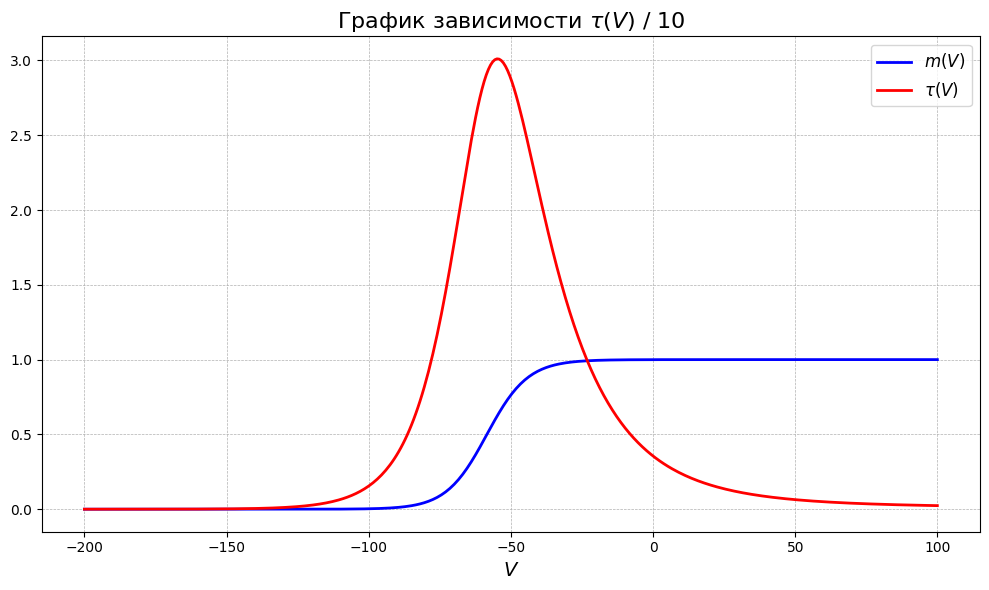

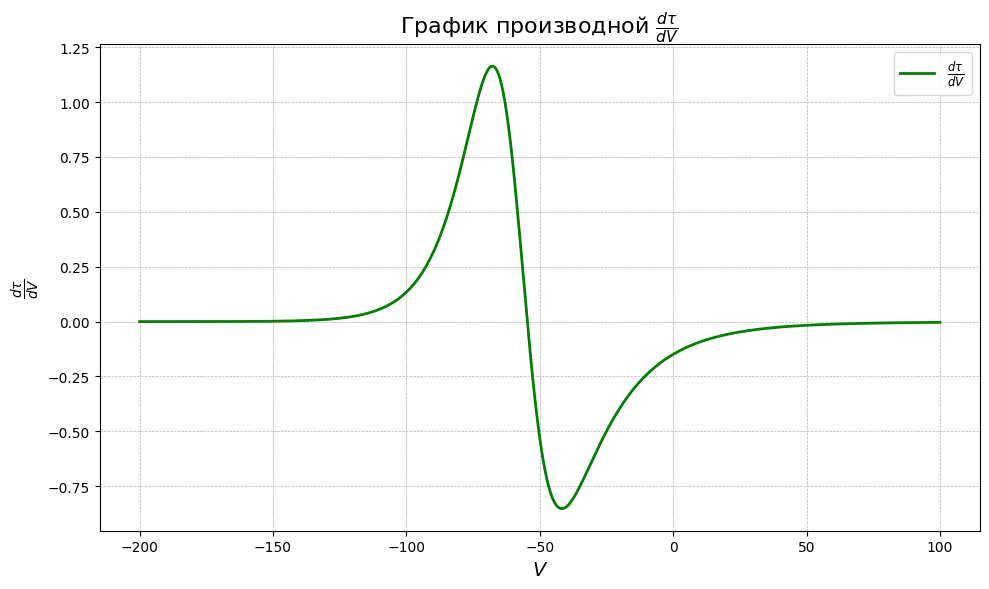

In [46]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Заданные параметры
a_a = 0.0628
b_a = -2.163
a_b = 0.0872
b_b = 9.16

# Генерация значений для графиков
V_values = np.linspace(-200, 100, 400)

# Получаем значения для m, tau и их производной
m_values = f_m(V_values, a_a, b_a, a_b, b_b)
tau_values = f_tau(V_values, a_a, b_a, a_b, b_b)
tau_derivative_values = np.array([f_tau_derivative(v, a_a, b_a, a_b, b_b) for v in V_values])

# График для m(V)
plt.figure(figsize=(10, 6))
plt.plot(V_values, m_values, label=r'$m(V)$', color='b', linewidth=2)
plt.title(r'График зависимости $m(V)$', fontsize=16)
plt.xlabel(r'$V$', fontsize=14)
# График для tau(V)
plt.plot(V_values, tau_values / 10, label=r'$\tau(V)$', color='r', linewidth=2)
plt.title(r'График зависимости $\tau(V)$ / 10', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()  # Убираем лишние отступы
plt.show()

# График для производной tau по V
plt.figure(figsize=(10, 6))
plt.plot(V_values, tau_derivative_values, label=r"$\frac{d\tau}{dV}$", color='g', linewidth=2)
plt.title(r'График производной $\frac{d\tau}{dV}$', fontsize=16)
plt.xlabel(r'$V$', fontsize=14)
plt.ylabel(r'$\frac{d\tau}{dV}$', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()  # Убираем лишние отступы
plt.show()


In [49]:
# Поиск точки максимума tau
def find_root_V(a_a, a_b, b_a, b_b):
    # Начальное приближение для поиска корня
    initial_guess = -60
    
    # Передаем параметры в f_tau_derivative через lambda-функцию
    root = fsolve(lambda V: f_tau_derivative(V, a_a, b_a, a_b, b_b), initial_guess, maxfev=10000)
    return root

root_value = find_root_V(a_a, a_b, b_a, b_b)
root_value

array([-54.68272396])

In [51]:
f_alpha = sym.lambdify((V, a_alpha, b_alpha, a_beta, b_beta), alpha_V, "numpy")
f_beta = sym.lambdify((V, a_alpha, b_alpha, a_beta, b_beta), beta_V, "numpy")
## Поиск численный V1/2

def find_root_of_equation(a_a, b_a, a_b, b_b):
    # Определим уравнение для поиска корня
    def equation(V):
        return f_alpha(V, a_a, b_a, a_b, b_b) - f_beta(V, a_a, b_a, a_b, b_b)
    # Начальное приближение для поиска корня (например, V = 0)
    initial_guess = -60
    root = fsolve(equation, initial_guess)
    return root

root_value = find_root_of_equation(a_a, b_a, a_b, b_b)
root_value


array([-58.42185601])